In [1]:
from wavefronts import *
from recons import *


In [2]:
an = antenna_set('/Users/prunet/Documents/Code/ADFRecons/Chiche/67.8/coord_antennas.txt')
co = coincidence_set('/Users/prunet/Documents/Code/ADFRecons/Chiche/67.8/Rec_coinctable.txt',an)

 Reading antenna positions from file /Users/prunet/Documents/Code/ADFRecons/Chiche/67.8/coord_antennas.txt
 Reading coincidence(s): index, peak time, peak amplitude from file /Users/prunet/Documents/Code/ADFRecons/Chiche/67.8/Rec_coinctable.txt


In [10]:
theta,phi = (np.deg2rad(112.25),np.deg2rad(270.))
Xants = co.antenna_coords_array[0,:,:]
nsimus = 10000
theta_rec = np.zeros(nsimus); phi_rec = np.zeros(nsimus)

In [11]:
for i in range(nsimus):
    tants = PWF_simulation((theta,phi),Xants,sigma_t=5.e-9)
    theta_r, phi_r = PWF_minimize_alternate_loss(Xants,tants)
    theta_rec[i] = np.rad2deg(theta_r)
    phi_rec[i] = np.rad2deg(phi_r)

In [12]:
fish = PWF_Fisher((theta,phi),Xants,sigma_t = 5e-9)
cov = np.linalg.inv(fish)

In [13]:
%matplotlib inline
from matplotlib import pyplot as plt

(2, 2)

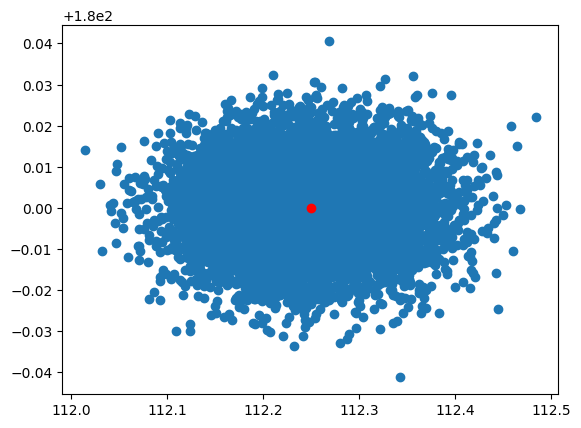

In [14]:
plt.scatter(theta_rec,phi_rec)
theta_deg = np.rad2deg(theta); phi_deg = np.rad2deg(phi)
plt.scatter(theta_deg,phi_deg,c='red')
# Plot Fisher matrix contours
fish.shape

In [15]:
params_deg = np.vstack((theta_rec,phi_rec))
params_cov = np.cov(params_deg)
params_cov

array([[3.95952927e-03, 1.45820488e-05],
       [1.45820488e-05, 8.90123814e-05]])

In [16]:
cov * (180./np.pi)**2

array([[4.00110301e-03, 8.49139281e-06],
       [8.49139281e-06, 8.97116122e-05]])